In [330]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [331]:
sticker_data = pd.read_csv('train.csv')

In [332]:
sticker_data.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [333]:
sticker_data.duplicated().sum()

0

In [334]:
sticker_data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [335]:
sticker_data.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [336]:
holographic_goose_sales = sticker_data[sticker_data['product'] == 'Holographic Goose']
missing_sales_holographic_goose = holographic_goose_sales['num_sold'].isna().sum()

print(f"Number of missing entries for 'Holographic Goose': {missing_sales_holographic_goose}")

Number of missing entries for 'Holographic Goose': 8806


In [337]:
missing_by_date_store = holographic_goose_sales[holographic_goose_sales['num_sold'].isna()]
missing_by_date_store_grouped = missing_by_date_store.groupby(['date', 'store']).size()

print(missing_by_date_store_grouped)

date        store            
2010-01-01  Discount Stickers    2
2010-01-02  Discount Stickers    2
2010-01-03  Discount Stickers    2
2010-01-04  Discount Stickers    2
            Stickers for Less    1
                                ..
2016-12-27  Discount Stickers    2
2016-12-28  Discount Stickers    2
2016-12-29  Discount Stickers    2
2016-12-30  Discount Stickers    2
2016-12-31  Discount Stickers    2
Length: 5352, dtype: int64


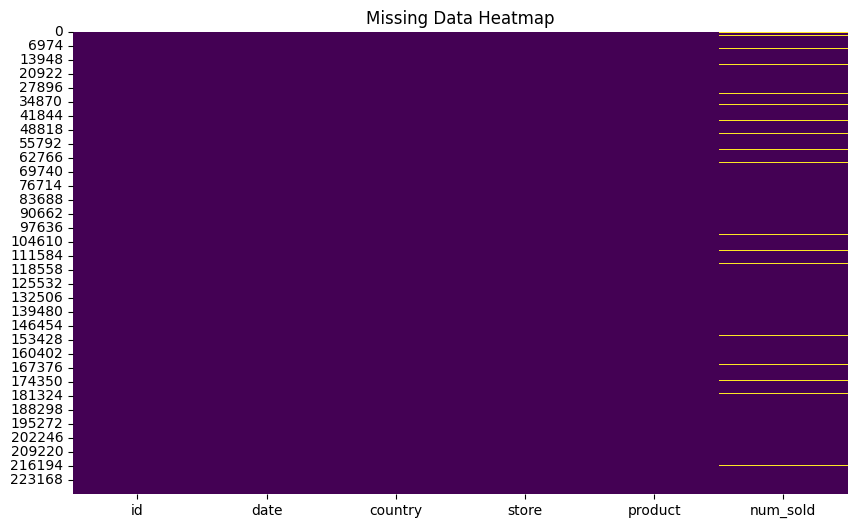

In [338]:
plt.figure(figsize=(10, 6))
sns.heatmap(sticker_data.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

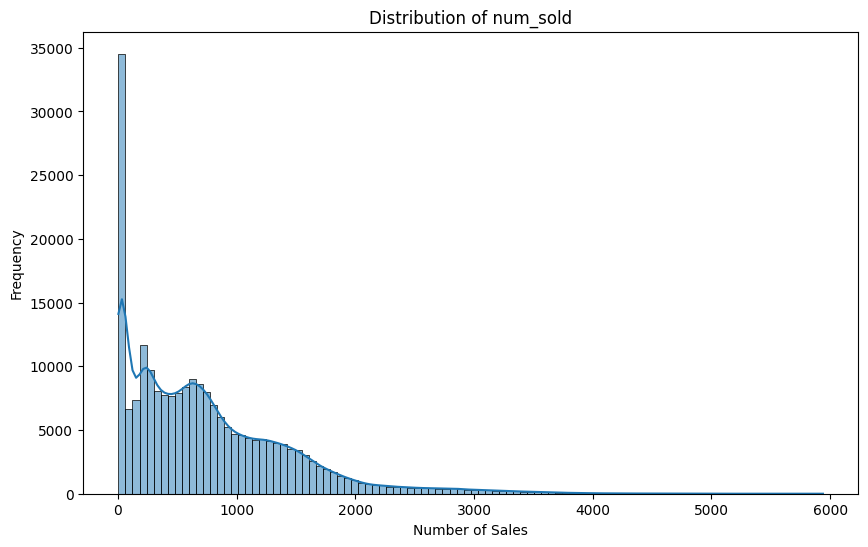

In [339]:
plt.figure(figsize=(10, 6))
sns.histplot(sticker_data['num_sold'], kde=True, bins=100)
plt.title("Distribution of num_sold")
plt.xlabel("Number of Sales")
plt.ylabel("Frequency")
plt.show()

In [340]:
print(f"Skewness of num_sold: {sticker_data['num_sold'].skew()}")

Skewness of num_sold: 1.415373452498392


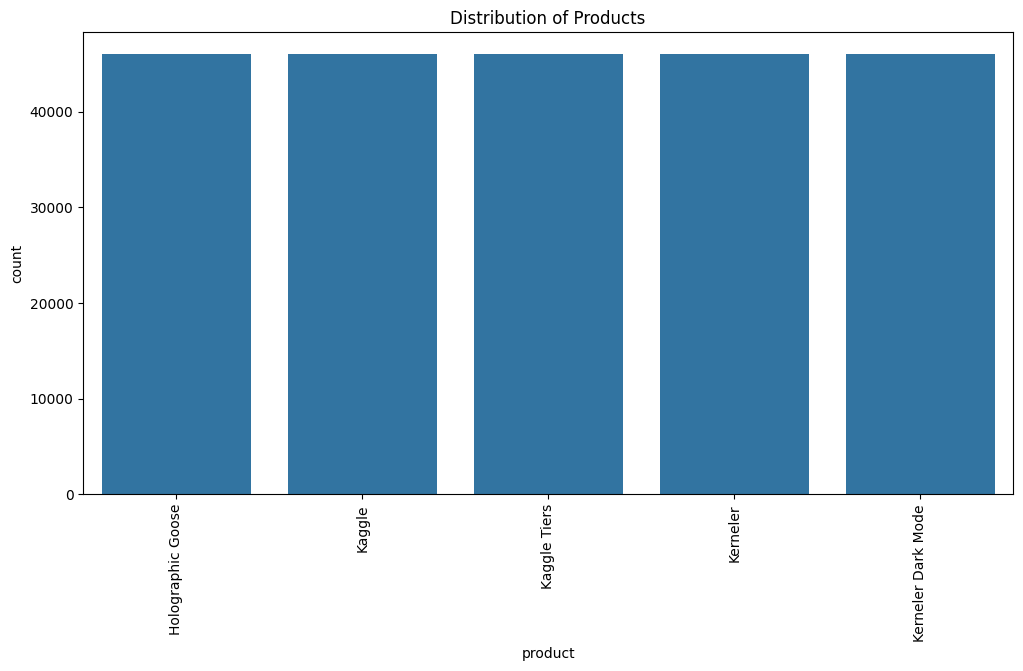

In [341]:
plt.figure(figsize=(12, 6))
sns.countplot(x='product', data=sticker_data, order=sticker_data['product'].value_counts().index)
plt.title("Distribution of Products")
plt.xticks(rotation=90)
plt.show()

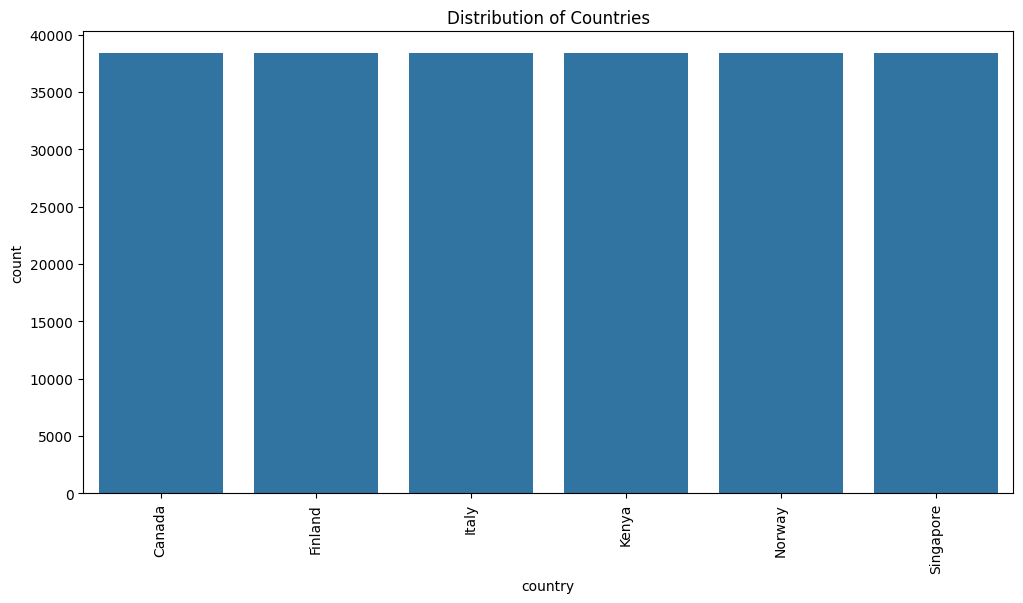

In [342]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=sticker_data, order=sticker_data['country'].value_counts().index)
plt.title("Distribution of Countries")
plt.xticks(rotation=90)
plt.show()

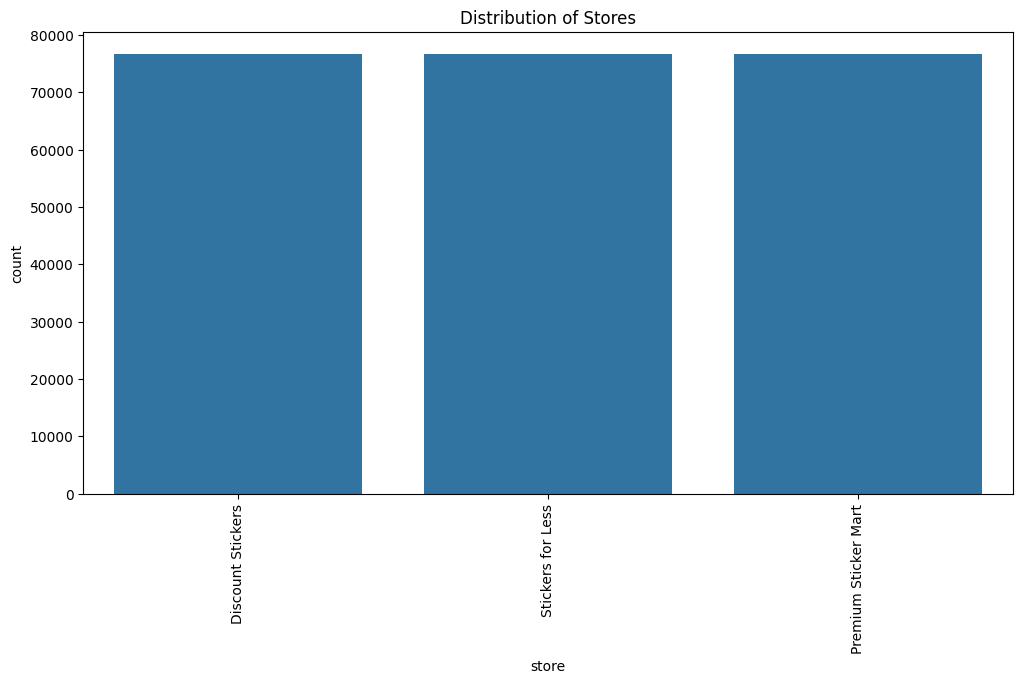

In [343]:
plt.figure(figsize=(12, 6))
sns.countplot(x='store', data=sticker_data, order=sticker_data['store'].value_counts().index)
plt.title("Distribution of Stores")
plt.xticks(rotation=90)
plt.show()

In [344]:
sticker_data['date'] = pd.to_datetime(sticker_data['date'])

sticker_data['year'] = sticker_data['date'].dt.year
sticker_data['month'] = sticker_data['date'].dt.month
sticker_data['day'] = sticker_data['date'].dt.day
sticker_data['weekday'] = sticker_data['date'].dt.weekday

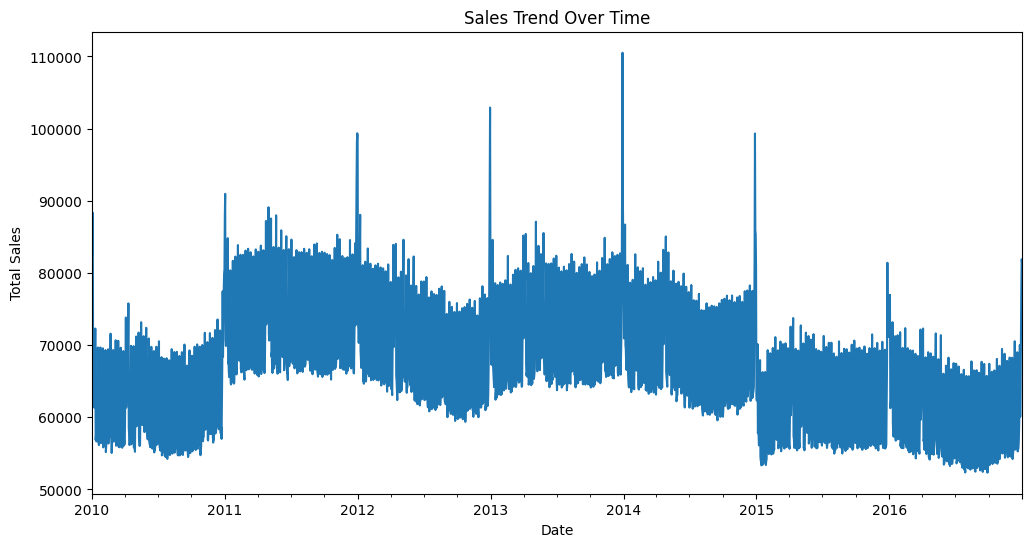

In [345]:
plt.figure(figsize=(12, 6))
sticker_data.groupby('date')['num_sold'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


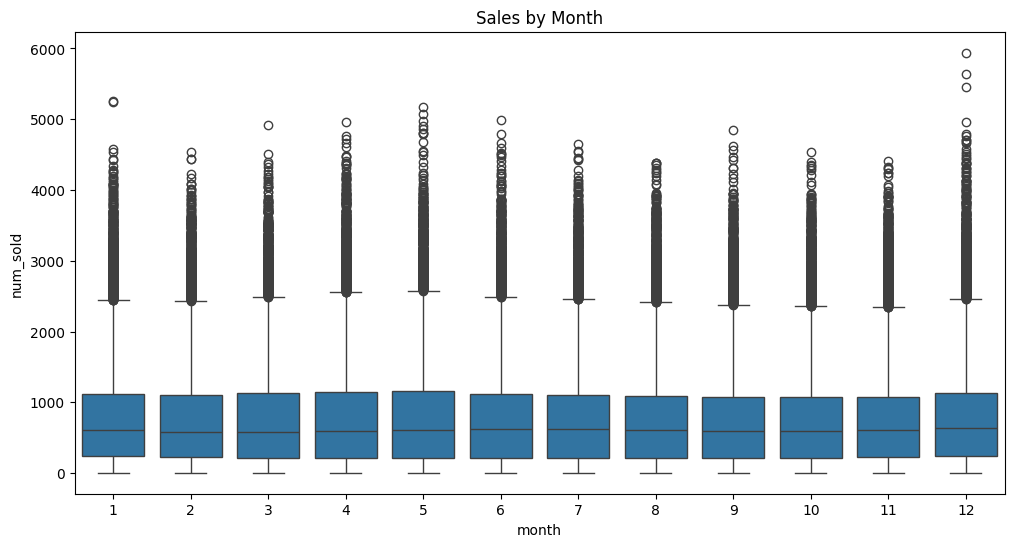

In [346]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='num_sold', data=sticker_data)
plt.title("Sales by Month")
plt.show()

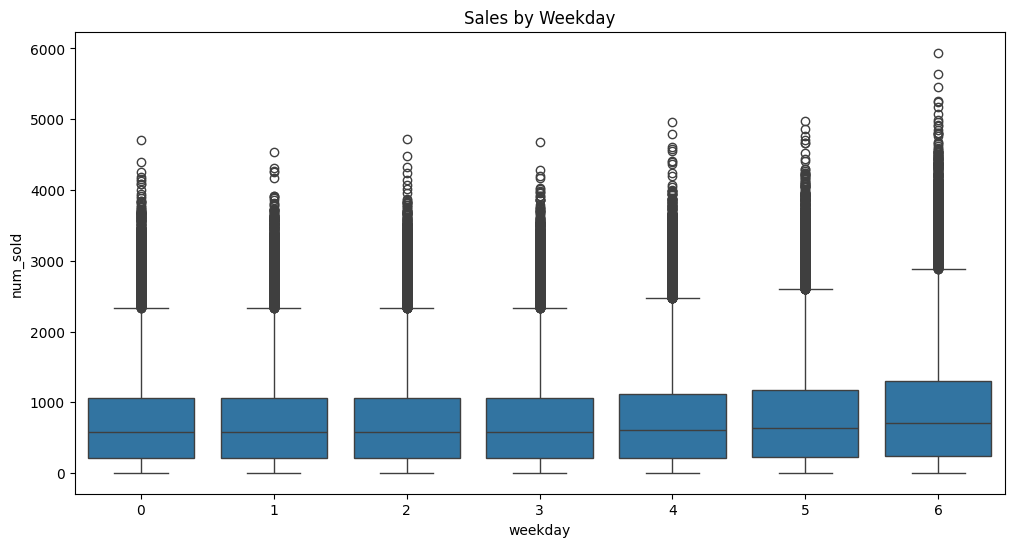

In [347]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='num_sold', data=sticker_data)
plt.title("Sales by Weekday")
plt.show()

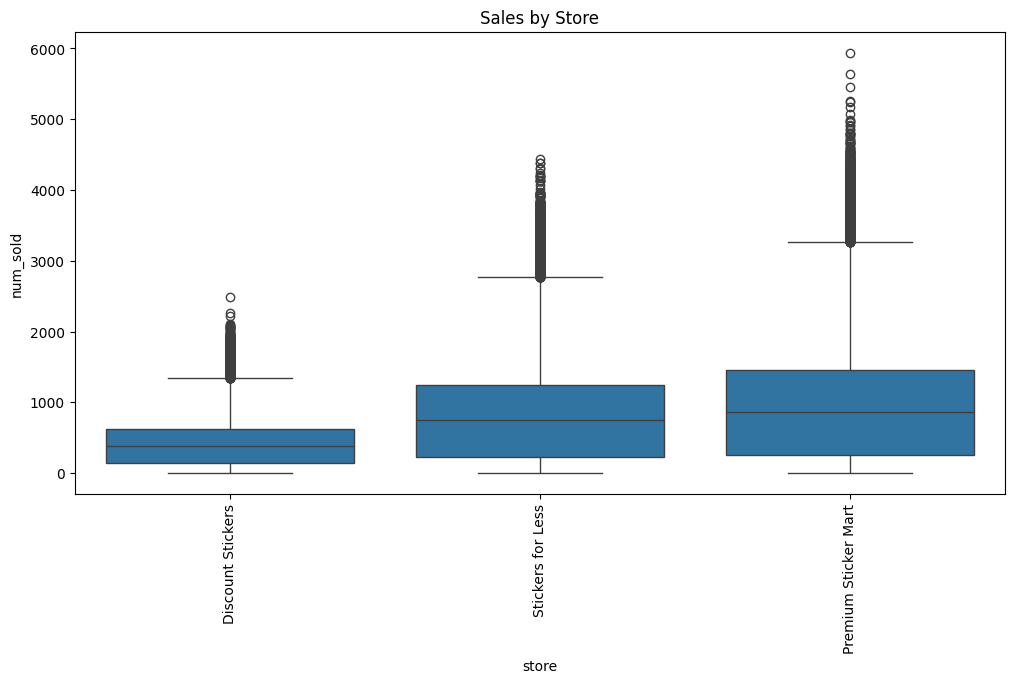

In [348]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='num_sold', data=sticker_data)
plt.title("Sales by Store")
plt.xticks(rotation=90)
plt.show()

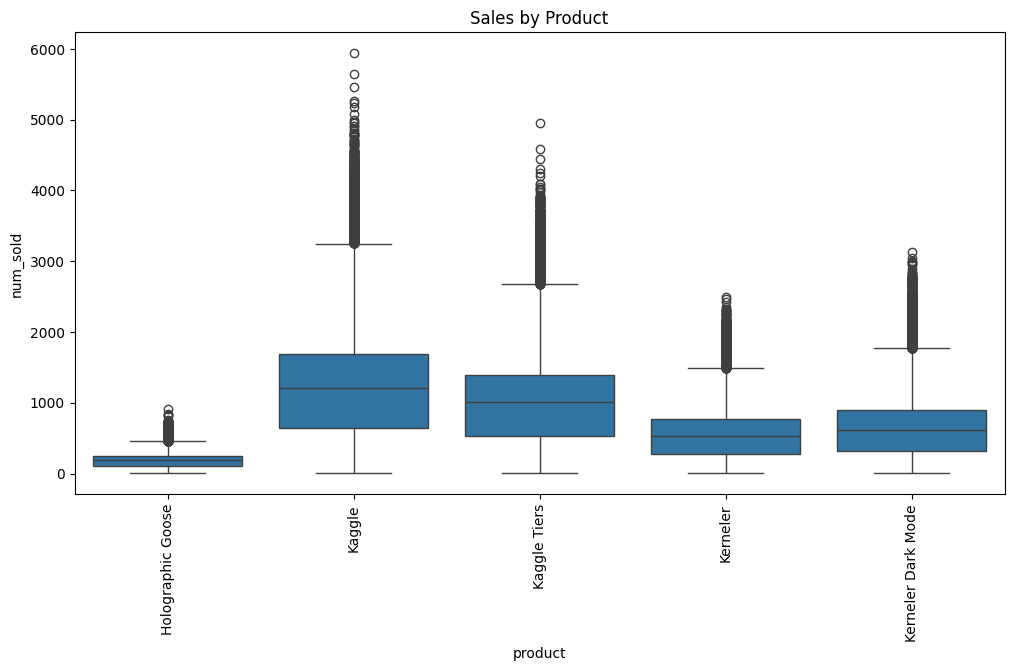

In [349]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='num_sold', data=sticker_data)
plt.title("Sales by Product")
plt.xticks(rotation=90)
plt.show()

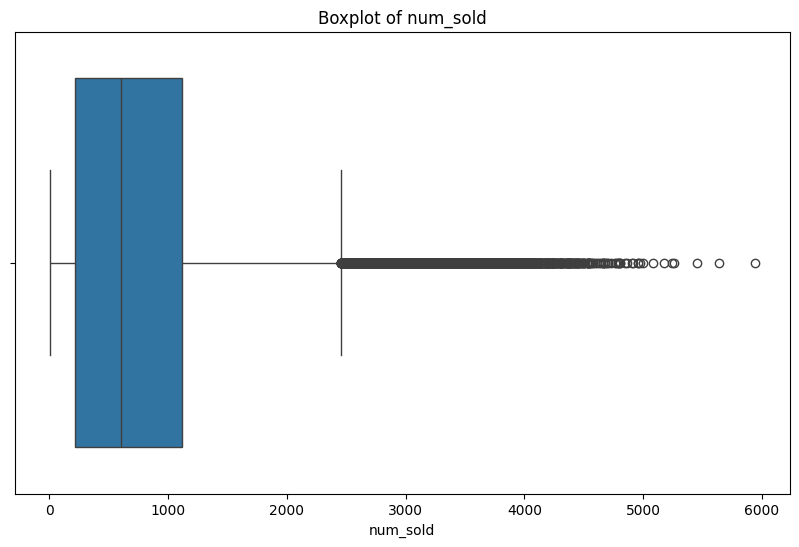

In [350]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=sticker_data['num_sold'])
plt.title("Boxplot of num_sold")
plt.show()

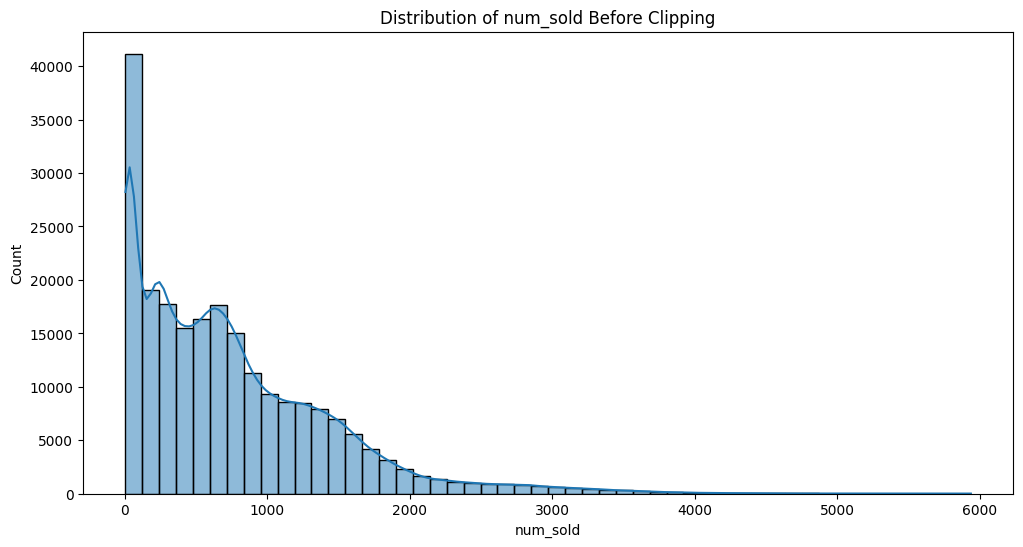

In [351]:
#before clipping outliers
plt.figure(figsize=(12, 6))
sns.histplot(sticker_data['num_sold'], kde=True, bins=50)
plt.title("Distribution of num_sold Before Clipping")
plt.show()

In [352]:
Q1 = sticker_data['num_sold'].quantile(0.25)
Q3 = sticker_data['num_sold'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -1123.5
Upper Bound: 2456.5


In [353]:
#clipping
sticker_data['num_sold'] = sticker_data['num_sold'].clip(lower=lower_bound, upper=upper_bound)


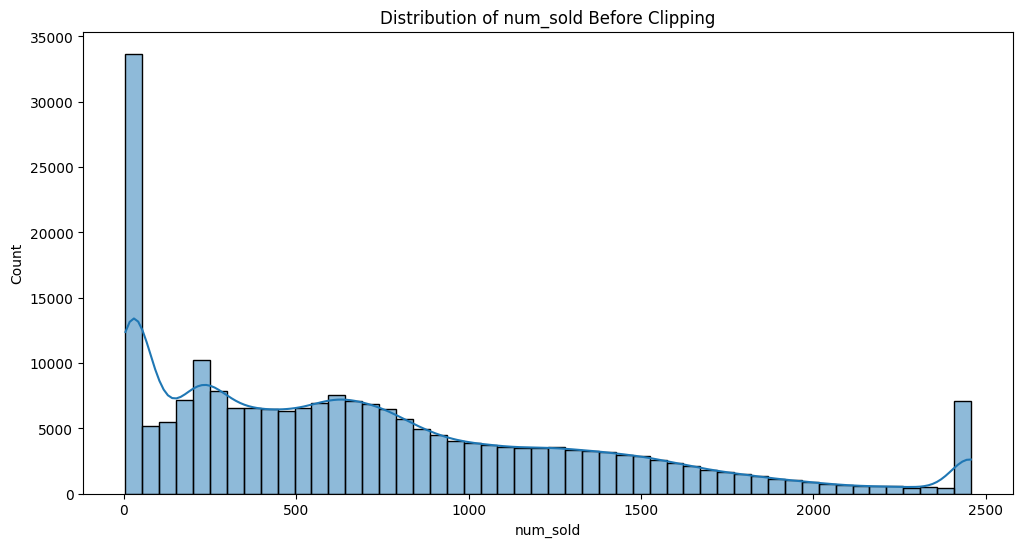

In [354]:
#after clipping
plt.figure(figsize=(12, 6))
sns.histplot(sticker_data['num_sold'], kde=True, bins=50)
plt.title("Distribution of num_sold Before Clipping")
plt.show()

In [355]:
print(f"Skewness of num_sold: {sticker_data['num_sold'].skew()}")

Skewness of num_sold: 0.9363336677047692


In [356]:
sticker_data['num_sold'] = np.sqrt(sticker_data['num_sold'])
print(f"Skewness of num_sold: {sticker_data['num_sold'].skew()}")

Skewness of num_sold: 0.023462746656651642


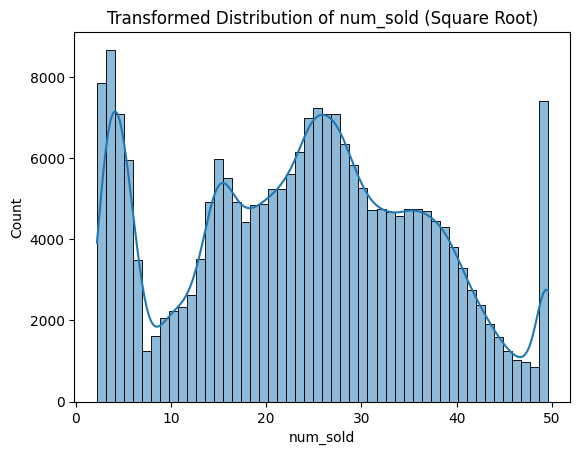

In [357]:
sns.histplot(sticker_data['num_sold'], kde=True, bins=50)
plt.title("Transformed Distribution of num_sold (Square Root)")
plt.show()

In [358]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns, numerical_columns, 
                 cat_imputer_strategy='most_frequent', num_imputer_strategy='median'):
        self.categorical_columns = categorical_columns
        self.numerical_columns = numerical_columns
        self.cat_imputer_strategy = cat_imputer_strategy
        self.num_imputer_strategy = num_imputer_strategy
        
        self.cat_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=self.cat_imputer_strategy)),  
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # Handle unseen categories
        ])
        
        self.num_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy=self.num_imputer_strategy)),  
            ('scaler', StandardScaler())  
        ])
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('cat', self.cat_transformer, self.categorical_columns),
                ('num', self.num_transformer, self.numerical_columns)
            ]
        )

    def fit(self, X, y=None):
        self.preprocessor.fit(X)
        return self
    
    def transform(self, X):
        return self.preprocessor.transform(X)

    def fit_transform(self, X, y=None):
        return self.preprocessor.fit_transform(X)

# Load data
train = pd.read_csv("train.csv")

# Define columns
categorical_columns = ['product', 'store', 'country']
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns.difference(['num_sold', 'id'])

# Initialize preprocessor
preprocessor = CustomPreprocessor(categorical_columns=categorical_columns, 
                                  numerical_columns=numerical_columns)

# Split features and target
X = train.drop(columns=['num_sold', 'id'])  
y = train['num_sold']  

# Preprocess features
X_transformed = preprocessor.fit_transform(X)

# Get feature names
onehot_columns = preprocessor.preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_columns)
all_column_names = list(onehot_columns) + list(numerical_columns)

# Convert to DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_column_names)

# Impute target variable if necessary
if y.isnull().any():
    imputer = SimpleImputer(strategy='median') 
    y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()
else:
    y_imputed = y.values

# Display results
print(X_transformed_df.head())

   product_Holographic Goose  product_Kaggle  product_Kaggle Tiers  \
0                        1.0             0.0                   0.0   
1                        0.0             1.0                   0.0   
2                        0.0             0.0                   1.0   
3                        0.0             0.0                   0.0   
4                        0.0             0.0                   0.0   

   product_Kerneler  product_Kerneler Dark Mode  store_Discount Stickers  \
0               0.0                         0.0                      1.0   
1               0.0                         0.0                      1.0   
2               0.0                         0.0                      1.0   
3               1.0                         0.0                      1.0   
4               0.0                         1.0                      1.0   

   store_Premium Sticker Mart  store_Stickers for Less  country_Canada  \
0                         0.0                   

In [371]:
X_transformed_df.columns = [col.split('_')[1] if '_' in col else col for col in X_transformed_df.columns]
df = pd.read_csv('train.csv')
X_transformed_df['Date'] = df['date']
X_transformed_df['Date'] = pd.to_datetime(X_transformed_df['Date'])
X_transformed_df['Year'] = X_transformed_df['Date'].dt.year
X_transformed_df['Month'] = X_transformed_df['Date'].dt.month
X_transformed_df['Day'] = X_transformed_df['Date'].dt.day
X_transformed_df['Weekday'] = X_transformed_df['Date'].dt.weekday
X_transformed_df['Weekend'] = X_transformed_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
X_transformed_df = X_transformed_df.drop(columns=['Date'], axis = 1)

print(X_transformed_df.head())

   Holographic Goose  Kaggle  Kaggle Tiers  Kerneler  Kerneler Dark Mode  \
0                1.0     0.0           0.0       0.0                 0.0   
1                0.0     1.0           0.0       0.0                 0.0   
2                0.0     0.0           1.0       0.0                 0.0   
3                0.0     0.0           0.0       1.0                 0.0   
4                0.0     0.0           0.0       0.0                 1.0   

   Discount Stickers  Premium Sticker Mart  Stickers for Less  Canada  \
0                1.0                   0.0                0.0     1.0   
1                1.0                   0.0                0.0     1.0   
2                1.0                   0.0                0.0     1.0   
3                1.0                   0.0                0.0     1.0   
4                1.0                   0.0                0.0     1.0   

   Finland  Italy  Kenya  Norway  Singapore  Year  Month  Day  Weekday  \
0      0.0    0.0    0.0     0

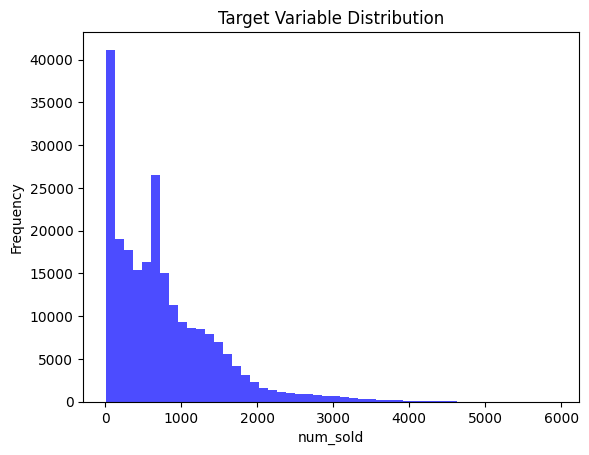

In [360]:
import matplotlib.pyplot as plt

plt.hist(y_imputed, bins=50, color='blue', alpha=0.7)
plt.title('Target Variable Distribution')
plt.xlabel('num_sold')
plt.ylabel('Frequency')
plt.show()

In [361]:
'''import seaborn as sns
import pandas as pd

data = pd.DataFrame(X_transformed_df) 
data['num_sold'] = y_imputed

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()'''

'import seaborn as sns\nimport pandas as pd\n\ndata = pd.DataFrame(X_transformed_df) \ndata[\'num_sold\'] = y_imputed\n\nplt.figure(figsize=(12, 8))\nsns.heatmap(data.corr(), annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Heatmap\')\nplt.show()'

In [362]:
'''import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_tensor = torch.tensor(X_transformed, dtype=torch.float32)  
y_tensor = torch.tensor(y_imputed, dtype=torch.float32).unsqueeze(1)  

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.fc(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = X_transformed.shape[1]
model = RegressionNN(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

epochs = 100
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}")

model.eval()
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        y_pred_list.append(y_pred.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

y_pred = np.concatenate(y_pred_list).flatten()
y_true = np.concatenate(y_true_list).flatten()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"Neural Network RMSE: {rmse:.4f}")
print(f"Neural Network MAE: {mae:.4f}")
'''

'import torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.data import DataLoader, TensorDataset\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\n\nX_tensor = torch.tensor(X_transformed, dtype=torch.float32)  \ny_tensor = torch.tensor(y_imputed, dtype=torch.float32).unsqueeze(1)  \n\nX_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)\n\ntrain_dataset = TensorDataset(X_train, y_train)\ntest_dataset = TensorDataset(X_test, y_test)\ntrain_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)\ntest_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)\n\nclass RegressionNN(nn.Module):\n    def __init__(self, input_dim):\n        super(RegressionNN, self).__init__()\n        self.fc = nn.Sequential(\n            nn.Linear(input_dim, 256),\n            nn.BatchNorm1d(256),\n            nn.ReLU(),\n    

In [363]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_imputed, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=500, learning_rate=0.5, max_depth=10, subsample=1, colsample_bytree=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse:.4f}")


XGBoost RMSE: 170.9803


In [372]:
test = pd.read_csv("test.csv")

test_ids = test['id']

X_test = test.drop(columns=['id'])

X_test_transformed = preprocessor.transform(X_test)

onehot_columns = preprocessor.preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_columns)
onehot_columns_simplified = [col.split('_', 1)[1] for col in onehot_columns]  # Remove prefixes from one-hot columns
all_column_names = onehot_columns_simplified + list(numerical_columns)

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_column_names)

df = pd.read_csv('test.csv')
X_test_transformed_df['Date'] = df['date']
X_test_transformed_df['Date'] = pd.to_datetime(X_test_transformed_df['Date'])
X_test_transformed_df['Year'] = X_test_transformed_df['Date'].dt.year
X_test_transformed_df['Month'] = X_test_transformed_df['Date'].dt.month
X_test_transformed_df['Day'] = X_test_transformed_df['Date'].dt.day
X_test_transformed_df['Weekday'] = X_test_transformed_df['Date'].dt.weekday
X_test_transformed_df['Weekend'] = X_test_transformed_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
X_test_transformed_df = X_test_transformed_df.drop(columns=['Date'], axis = 1)

X_test_transformed_df.insert(0, 'id', test_ids)



print(X_test_transformed_df.head())


       id  Holographic Goose  Kaggle  Kaggle Tiers  Kerneler  \
0  230130                1.0     0.0           0.0       0.0   
1  230131                0.0     1.0           0.0       0.0   
2  230132                0.0     0.0           1.0       0.0   
3  230133                0.0     0.0           0.0       1.0   
4  230134                0.0     0.0           0.0       0.0   

   Kerneler Dark Mode  Discount Stickers  Premium Sticker Mart  \
0                 0.0                1.0                   0.0   
1                 0.0                1.0                   0.0   
2                 0.0                1.0                   0.0   
3                 0.0                1.0                   0.0   
4                 1.0                1.0                   0.0   

   Stickers for Less  Canada  Finland  Italy  Kenya  Norway  Singapore  Year  \
0                0.0     1.0      0.0    0.0    0.0     0.0        0.0  2017   
1                0.0     1.0      0.0    0.0    0.0     0.

In [365]:
'''import torch
import pandas as pd

model.eval()

X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)

with torch.no_grad(): 
    predictions = model(X_test_tensor).numpy()

predictions = predictions.flatten()

test_ids = test['id']

submission = pd.DataFrame({
    'id': test_ids,
    'num_sold': predictions
})

submission.to_csv("submission.csv", index=False)

print("Predictions saved to 'submission.csv'")'''


'import torch\nimport pandas as pd\n\nmodel.eval()\n\nX_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)\n\nwith torch.no_grad(): \n    predictions = model(X_test_tensor).numpy()\n\npredictions = predictions.flatten()\n\ntest_ids = test[\'id\']\n\nsubmission = pd.DataFrame({\n    \'id\': test_ids,\n    \'num_sold\': predictions\n})\n\nsubmission.to_csv("submission.csv", index=False)\n\nprint("Predictions saved to \'submission.csv\'")'

In [ ]:
# Assuming 'test' is your test DataFrame and it contains only the features, including 'id'.
# The 'num_sold' column should not be in the test set

# Prepare test features (drop 'id' column from the test set for prediction)
X_test = test.drop(columns=['id'])  # Only drop 'id', not 'num_sold' because it's not in the test data

# Apply the same preprocessing pipeline to the test data
X_test_transformed = preprocessor.transform(X_test)

# Check the shape of the transformed test data to ensure it matches the training data
print("X_test_transformed shape:", X_test_transformed.shape)

# Now, predict using the trained model (e.g., XGBoost or Neural Network)
y_pred = model.predict(X_test_transformed)

# Retain the 'id' column from the original test data
submission = pd.DataFrame({
    'id': test['id'],  # Assuming 'test' contains the 'id' column
    'num_sold': y_pred  # Predicted values for num_sold
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'")


X_test_transformed shape: (98550, 14)
Predictions saved to 'submission.csv'
